### Importing the relevant libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

### Data Preprocessing

In [55]:
row_data = pd.read_excel("data.xlsx", sheet_name="data")
products = pd.read_csv("products.csv")
order_reviews = pd.read_csv("order_reviews.csv")
data = row_data

In [42]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [56]:
productos_subset = products[['product_id', 'product_category_name']]
data = pd.merge(data, productos_subset, on='product_id', how='left')
order_review_subset = order_reviews[['review_id', 'review_score']]
data = pd.merge(data, order_review_subset, on='review_id', how='left')

In [57]:
data.head(2)

,order_id,customer_id,order_status,Payment_type,Customer_state,Value_purchase,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,day_of_delivery,Puntual,review_id,review_score_x,low_score,review_comment_title,review_comment_message,review_creation_date,product_id,price,freight_value,seller_id,seller_city,seller_state,coincidence_state,product_category_name,review_score_y
0,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,credit_card,SP,157.60,2018-03-19,2018-03-20,2018-03-28,2018-03-29,2018-03-29,0,Puntual,67b1ab8f3ec19d5a90f153f21757d3a1,1,1,NaN,Na descriÃ§Ã£o do produto quando fui efetuar a...,NaT,310ae3c140ff94b03219ad0adc3c778f,145.95,11.65,a416b6a846a11724393025641d4edd5e,sao paulo,SP,1,beleza_saude,1
1,000aed2e25dbad2f9ddb70584c5a2ded,fff5169e583fd07fac9fec88962f189d,delivered,credit_card,SP,152.77,2018-05-11,2018-05-11,2018-05-16,2018-05-18,2018-05-22,-4,Anticipado,00800678dcf28b0ea0caef2147b6945d,1,1,produto nÃ£o entregue,Mudo minha opiniÃ£o assim que receber o produto.,NaT,4fa33915031a8cde03dd0d3e8fb27f01,144.00,8.77,fe2032dab1a61af8794248c8196565c9,campinas,SP,1,perfumaria,1


In [58]:
data = data.drop('order_id', axis=1)
data = data.drop('customer_id', axis=1)
data = data.drop('low_score', axis=1)
data = data.drop('seller_city', axis=1)
data = data.drop('seller_id', axis=1)
data = data.drop('product_id', axis=1)
data = data.drop('review_id', axis=1)
data = data.drop('freight_value', axis=1)
data = data.drop('review_creation_date', axis=1)
data = data.drop('order_approved_at', axis=1)
data = data.drop('order_delivered_carrier_date', axis=1)
data = data.drop('order_delivered_customer_date', axis=1)
data = data.drop('order_purchase_timestamp', axis=1)
data = data.drop('order_status', axis=1)
data = data.drop('order_estimated_delivery_date', axis=1)
data = data.drop('price', axis=1)

In [61]:
data.rename(columns={'Puntual': 'Puntuality'}, inplace=True)
data.rename(columns={'review_score_y': 'review_score'}, inplace=True)

In [63]:
nuevo_ordenr_columnas = ['product_category_name', 'Payment_type', 'seller_state', 'Customer_state', 'coincidence_state', 'Value_purchase', 'day_of_delivery', 'Puntuality', 'review_comment_title', 'review_comment_message', 'review_score']

In [64]:
data = data[nuevo_ordenr_columnas]

In [65]:
data.head(5)

,product_category_name,Payment_type,seller_state,Customer_state,coincidence_state,Value_purchase,day_of_delivery,Puntuality,review_comment_title,review_comment_message,review_score
0,beleza_saude,credit_card,SP,SP,1,157.60,0,Puntual,NaN,Na descriÃ§Ã£o do produto quando fui efetuar a...,1
1,perfumaria,credit_card,SP,SP,1,152.77,-4,Anticipado,produto nÃ£o entregue,Mudo minha opiniÃ£o assim que receber o produto.,1
2,moveis_decoracao,credit_card,PR,MG,0,83.25,-15,Anticipado,NaN,NaN,2
3,cama_mesa_banho,boleto,SP,RJ,0,55.11,-15,Anticipado,NaN,Entrega muito demorada. Ainda nÃ£o recebi o pr...,1
4,beleza_saude,credit_card,MG,MG,1,51.10,-1,Anticipado,Pessima,O produto chegou e estragou sozinho,1


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5763 entries, 0 to 5762
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_category_name   5674 non-null   object 
 1   Payment_type            5763 non-null   object 
 2   seller_state            5763 non-null   object 
 3   Customer_state          5763 non-null   object 
 4   coincidence_state       5763 non-null   int64  
 5   Value_purchase          5763 non-null   float64
 6   day_of_delivery         5763 non-null   int64  
 7   Puntuality              5763 non-null   object 
 8   review_comment_title    1605 non-null   object 
 9   review_comment_message  4253 non-null   object 
 10  review_score            5763 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 495.4+ KB


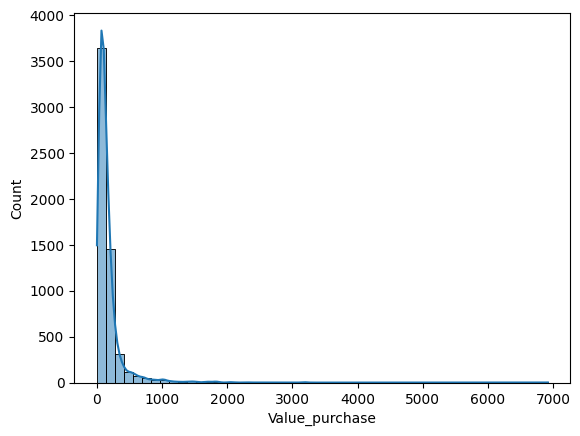

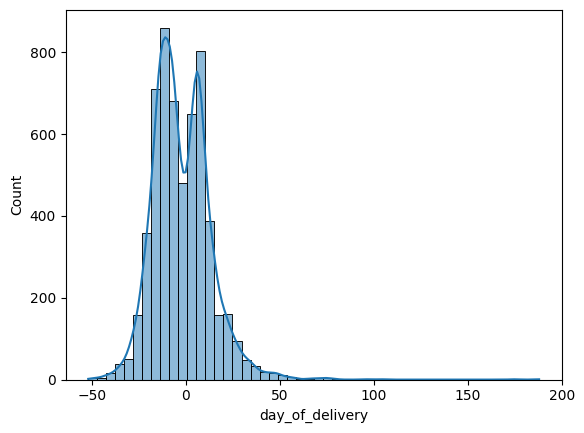

In [67]:
# Identificar valores nulos
data.isna().sum()

# Visualizar distribución de variables cuantitativas
sns.histplot(data['Value_purchase'], bins=50, kde=True)
plt.show()

sns.histplot(data['day_of_delivery'], bins=50, kde=True)
plt.show()

### Relación entre las variables values_purchase y day_of_delivery

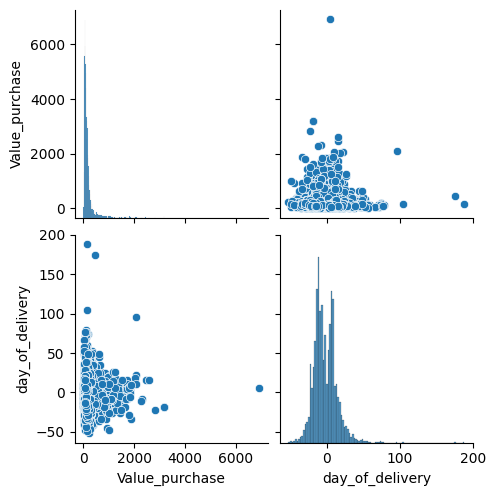

In [68]:
sns.pairplot(data[['Value_purchase', 'day_of_delivery']])
plt.show()

### Análisis de variables cualitativas

In [69]:
print(data['Payment_type'].unique())


['credit_card' 'boleto' 'debit_card' 'voucher']


### Distribución de calificaciones

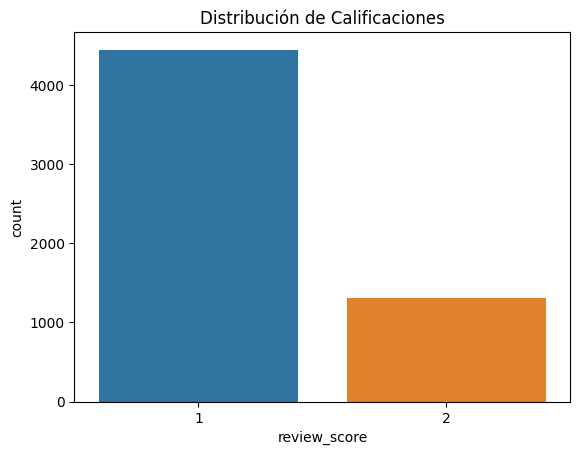

In [78]:
sns.countplot(x='review_score', data=data)
plt.title('Distribución de Calificaciones')
plt.show()

### Distribución de la categoría del producto

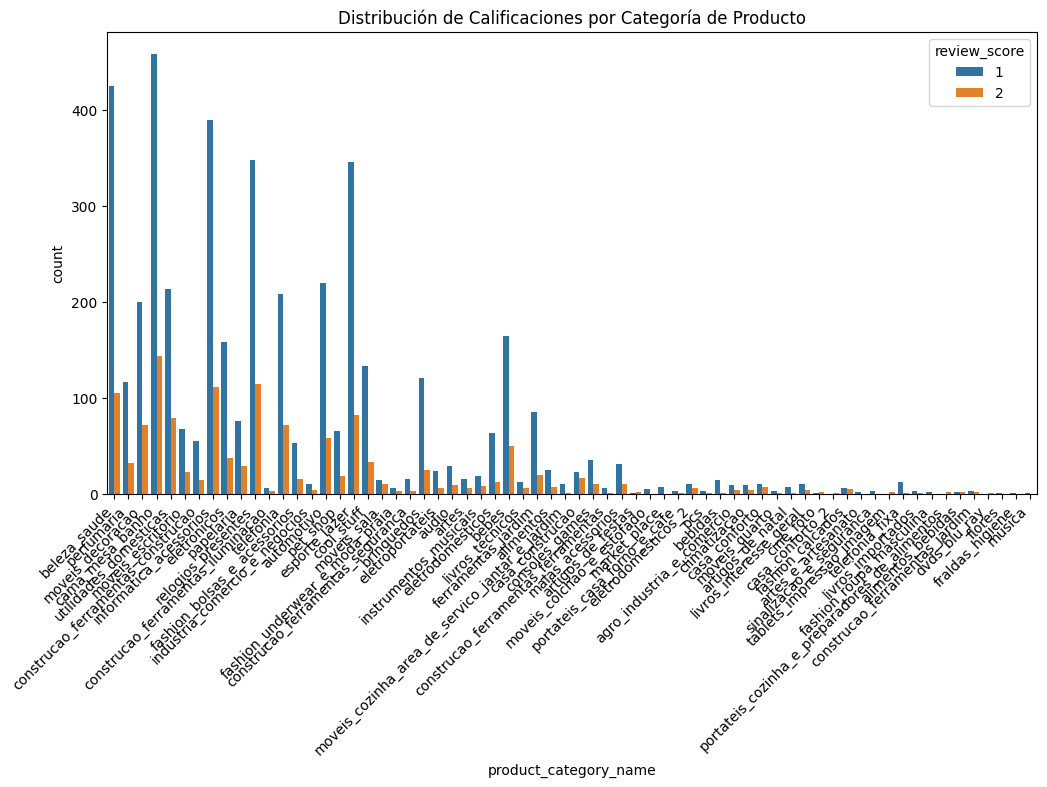

In [79]:
plt.figure(figsize=(12, 6))
sns.countplot(x='product_category_name', data=data, hue='review_score')
plt.title('Distribución de Calificaciones por Categoría de Producto')
plt.xticks(rotation=45, ha='right')
plt.show()

### Disttribución del estado del vendedor

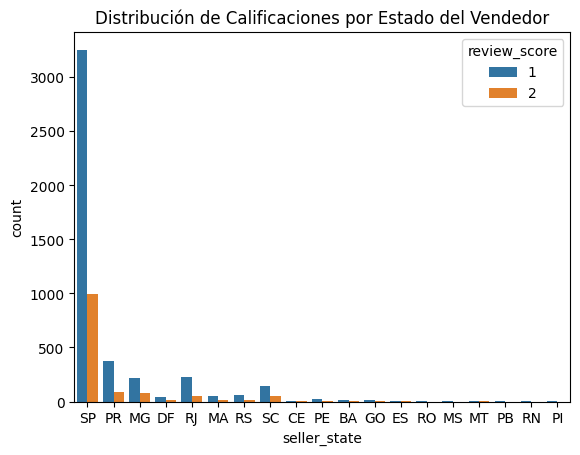

In [80]:
sns.countplot(x='seller_state', data=data, hue='review_score')
plt.title('Distribución de Calificaciones por Estado del Vendedor')
plt.show()

### Distribución del estado del cliente

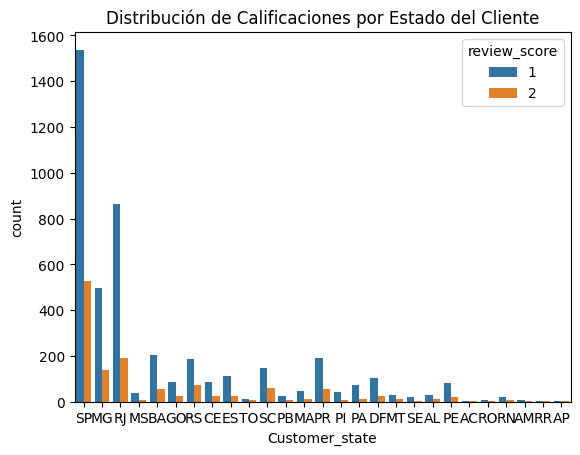

In [81]:
sns.countplot(x='Customer_state', data=data, hue='review_score')
plt.title('Distribución de Calificaciones por Estado del Cliente')
plt.show()

### Exploración de comentarios de review

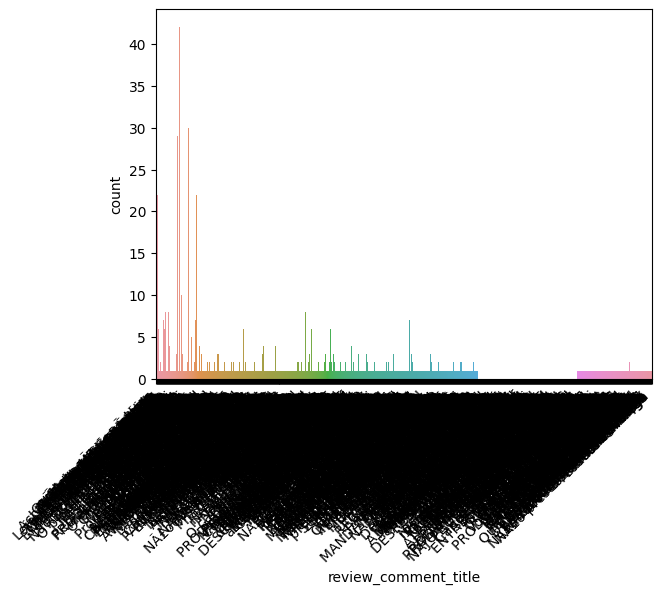

In [70]:
# Ejemplo para 'review_comment_title'
sns.countplot(x='review_comment_title', data=data)
plt.xticks(rotation=45, ha='right')
plt.show()

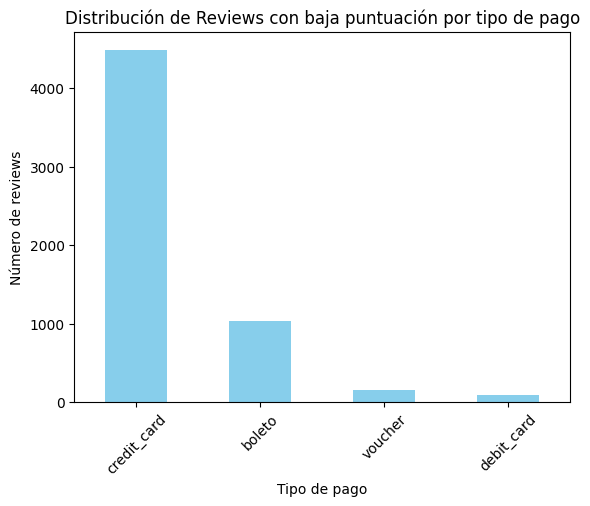

In [73]:
payment_type_counts = data['Payment_type'].value_counts()
payment_type_counts.plot(kind='bar', rot=45, color='skyblue')
plt.xlabel('Tipo de pago')
plt.ylabel('Número de reviews')
plt.title('Distribución de Reviews con baja puntuación por tipo de pago')
plt.show()

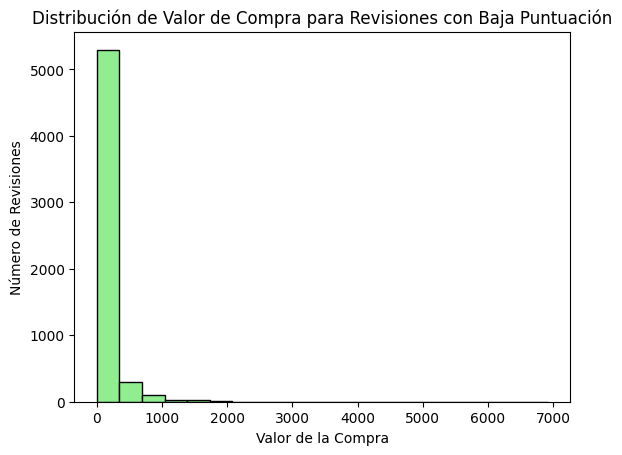

In [74]:
plt.hist(data['Value_purchase'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Valor de la Compra')
plt.ylabel('Número de Revisiones')
plt.title('Distribución de Valor de Compra para Revisiones con Baja Puntuación')
plt.show()

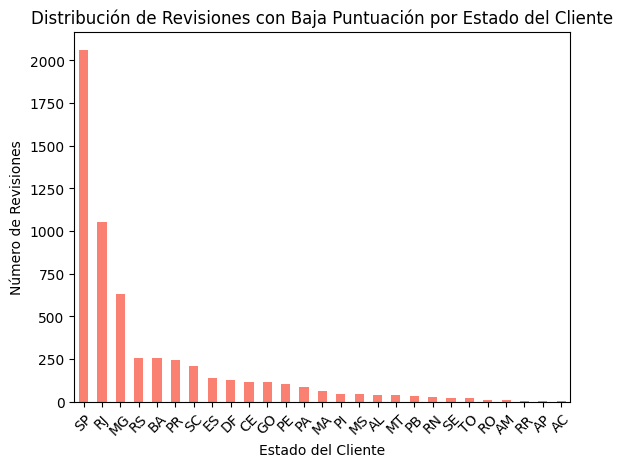

In [75]:
customer_state_counts = data['Customer_state'].value_counts()
customer_state_counts.plot(kind='bar', rot=45, color='salmon')
plt.xlabel('Estado del Cliente')
plt.ylabel('Número de Revisiones')
plt.title('Distribución de Revisiones con Baja Puntuación por Estado del Cliente')
plt.show()

### Modelado

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [83]:
features = ['coincidence_state', 'Value_purchase', 'day_of_delivery']
X = data[features]
y = data['review_score'] 

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [86]:
y_pred = model.predict(X_test)

In [87]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7129228100607112
Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.86      0.82       904
           2       0.27      0.20      0.23       249

    accuracy                           0.71      1153
   macro avg       0.53      0.53      0.53      1153
weighted avg       0.68      0.71      0.70      1153

Confusion Matrix:
 [[773 131]
 [200  49]]
